## Câu 1: Xác định xu hướng giá vàng trong 6 tháng qua.

In [98]:
import plotly.express as px
import pandas as pd
import plotly.graph_objects as go
import numpy as np

In [87]:
# Đọc tệp CSV
file_path = 'data/PNJ.csv'
data = pd.read_csv(file_path,index_col=0)

# Chuyển đổi cột 'date' sang định dạng datetime để lọc dữ liệu
data['date'] = pd.to_datetime(data['date'])

# Tạo cột 'month' để nhóm dữ liệu theo tháng
data['month'] = data['date'].dt.to_period('M')

# Lọc dữ liệu trong 6 tháng gần đây
end_date = data['date'].max()
start_date = end_date - pd.DateOffset(months=5)
last_6_months_data = data[(data['date'] >= start_date) & (data['date'] <= end_date)]

# Danh sách các tháng trong 6 tháng gần đây
months = last_6_months_data['month'].unique()
    
# Tính giá trung bình mua và bán cho từng tháng
monthly_avg_sell = []
for month in months:
    monthly_data = last_6_months_data[last_6_months_data['month'] == month]
    avg_sell = monthly_data['sell'].mean()
    monthly_avg_sell.append(avg_sell)


# Tạo DataFrame để hiển thị bảng dữ liệu trung bình hàng tháng
monthly_avg_df = pd.DataFrame({
    'month': months.astype(str),
    'sell': monthly_avg_sell
})

# Tính giá trung bình mua và bán cho 6 tháng gần đây
average_sell_price = sum(monthly_avg_sell) / len(monthly_avg_sell)

# Tính toán xu hướng thay đổi giá bán trong 6 tháng gần đây
trends_last_6_months = []
for i in range(1, len(monthly_avg_sell)):
    change = ((monthly_avg_sell[i] - monthly_avg_sell[i-1]) / monthly_avg_sell[i-1]) * 100
    trends_last_6_months.append(change)

# Xác định xu hướng tổng thể cho 6 tháng gần đây
if all(change > 0 for change in trends_last_6_months):
    overall_trend_last_6_months = "Tăng"
elif all(change < 0 for change in trends_last_6_months):
    overall_trend_last_6_months = "Giảm"
else:
    overall_trend_last_6_months = "Không ổn định"

# Tính tổng tỷ lệ phần trăm tăng và giảm cho 6 tháng gần đây
increase_percentage_last_6_months = sum(p for p in trends_last_6_months if p > 0)
decrease_percentage_last_6_months = sum(p for p in trends_last_6_months if p < 0)

if increase_percentage_last_6_months > abs(decrease_percentage_last_6_months):
    overall_trend_last_6_months = 'Tăng'
    print(f"Tổng tỷ lệ phần trăm tăng giá theo giá bán: {increase_percentage_last_6_months:.2f}%")
else:
    overall_trend_last_6_months = 'Giảm'
    print(f"Tổng tỷ lệ phần trăm giảm giá theo giá bán: {decrease_percentage_last_6_months:.2f}%")


print("Bảng dữ liệu trung bình hàng tháng:")
print(monthly_avg_df)
print(f"Giá vàng trung bình bán trong 6 tháng gần đây là: {average_sell_price:.2f}")
print(f"Xu hướng thay đổi giá vàng theo giá bán trong 6 tháng qua: {overall_trend_last_6_months}")
# print(trends_last_6_months)
trends_last_6_months.insert(0,0)
monthly_avg_df['trend']=trends_last_6_months

Tổng tỷ lệ phần trăm tăng giá theo giá bán: 17.84%
Bảng dữ liệu trung bình hàng tháng:
     month       sell
0  2024-01  62.700000
1  2024-02  63.397500
2  2024-03  67.600000
3  2024-04  73.102174
4  2024-05  74.534615
5  2024-06  73.173333
Giá vàng trung bình bán trong 6 tháng gần đây là: 69.08
Xu hướng thay đổi giá vàng theo giá bán trong 6 tháng qua: Tăng


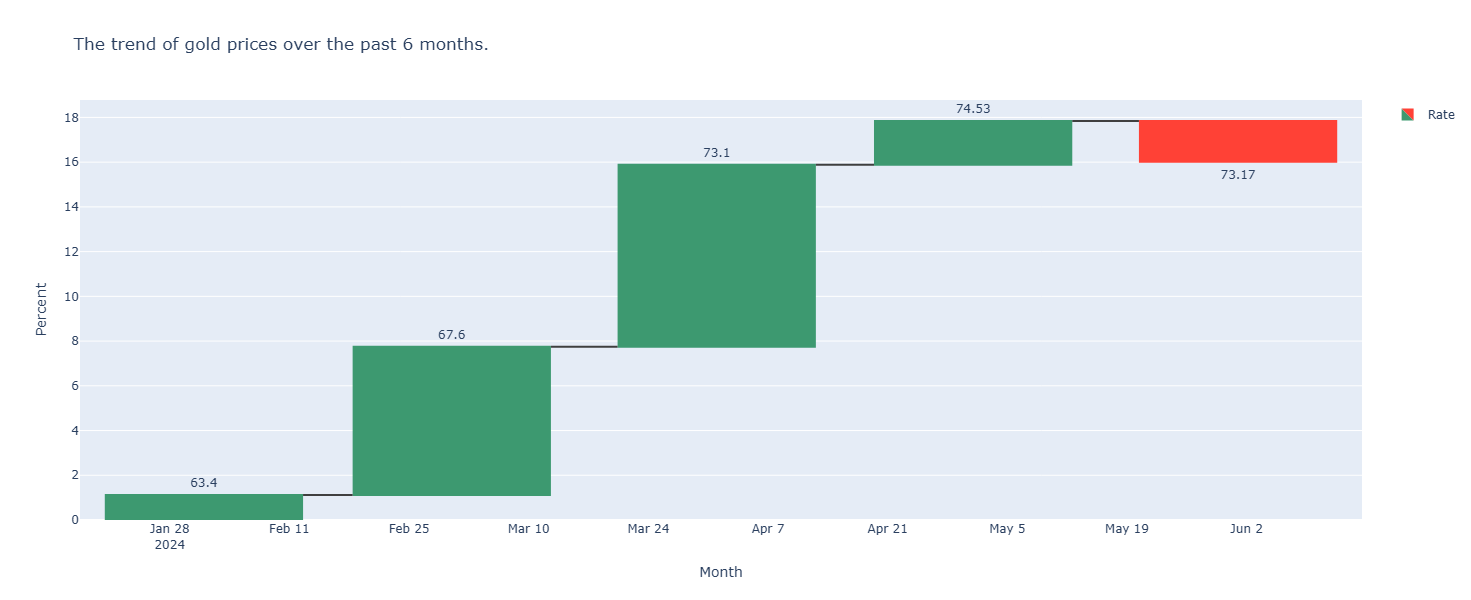

In [108]:
import plotly.graph_objects as go

fig = go.Figure(go.Waterfall(
    name = "Rate", orientation = "v",
    text = round(monthly_avg_df['sell'][1:],2),
    x = monthly_avg_df['month'][1:], y=monthly_avg_df['trend'][1:],
    connector = {"line":{"color":"rgb(63, 63, 63)"}},
    textposition="outside",
))

fig.update_layout(
        title = "The trend of gold prices over the past 6 months.",
        xaxis_title='Month',
        yaxis_title='Percent',
        showlegend = True,
        width=1200,
        height=600
)

fig.show()

## Câu 2: Xác định quý nào có tỉ lệ giá vàng tăng cao nhất?

In [89]:
# Tạo cột mới cho quý theo cách phân chia của bạn
def get_custom_quarter(date):
    month = date.month
    if month >= 1 and month <= 4:
        return 'Q1'
    elif month >= 5 and month <= 8:
        return 'Q2'
    elif month >= 9 and month <= 12:
        return 'Q3'

data['quarter'] = data['date'].apply(get_custom_quarter)

# Tạo cột cho quý và năm
data['quarter_year'] = data['date'].dt.year.astype(str) + '-' + data['quarter']

# Tính giá trung bình cho mỗi quý-năm
quarterly_avg_prices = data.groupby('quarter_year',group_keys=True)['sell'].mean()

# Tính tỉ lệ phần trăm thay đổi cho mỗi quý-năm
quarterly_percentage_change = quarterly_avg_prices.pct_change() * 100

# Xác định quý có tỉ lệ tăng cao nhất
max_increase_quarter = quarterly_percentage_change.idxmax()
max_increase_rate = quarterly_percentage_change.max()

print(quarterly_percentage_change)
print(f"Quý có tỉ lệ tăng cao nhất: {max_increase_quarter}")
print(f"Tỉ lệ tăng cao nhất trong quý đó: {max_increase_rate:.2f}%")
# quarterly_avg_prices['trend']=trends_last_6_months


quarter_year
2014-Q2          NaN
2014-Q3    -5.983225
2015-Q1     0.998457
2015-Q2    -3.389875
2015-Q3    -1.847055
2016-Q1     4.741234
2016-Q2     7.874958
2016-Q3    -1.163713
2017-Q1    -0.143625
2017-Q2     0.823833
2017-Q3     2.466076
2018-Q1     3.204451
2018-Q2    -3.438164
2018-Q3    -1.623031
2019-Q1     4.827807
2019-Q2     5.549901
2019-Q3     7.388370
2020-Q1     7.813419
2020-Q2    12.343002
2020-Q3     7.414678
2021-Q1    -0.886582
2021-Q2    -2.831650
2021-Q3    -0.932431
2022-Q1     5.740617
2022-Q2    -2.339309
2022-Q3    -1.503787
2023-Q1     4.274703
2023-Q2     2.579307
2023-Q3     4.925286
2024-Q1    13.708942
2024-Q2    11.120381
Name: sell, dtype: float64
Quý có tỉ lệ tăng cao nhất: 2024-Q1
Tỉ lệ tăng cao nhất trong quý đó: 13.71%


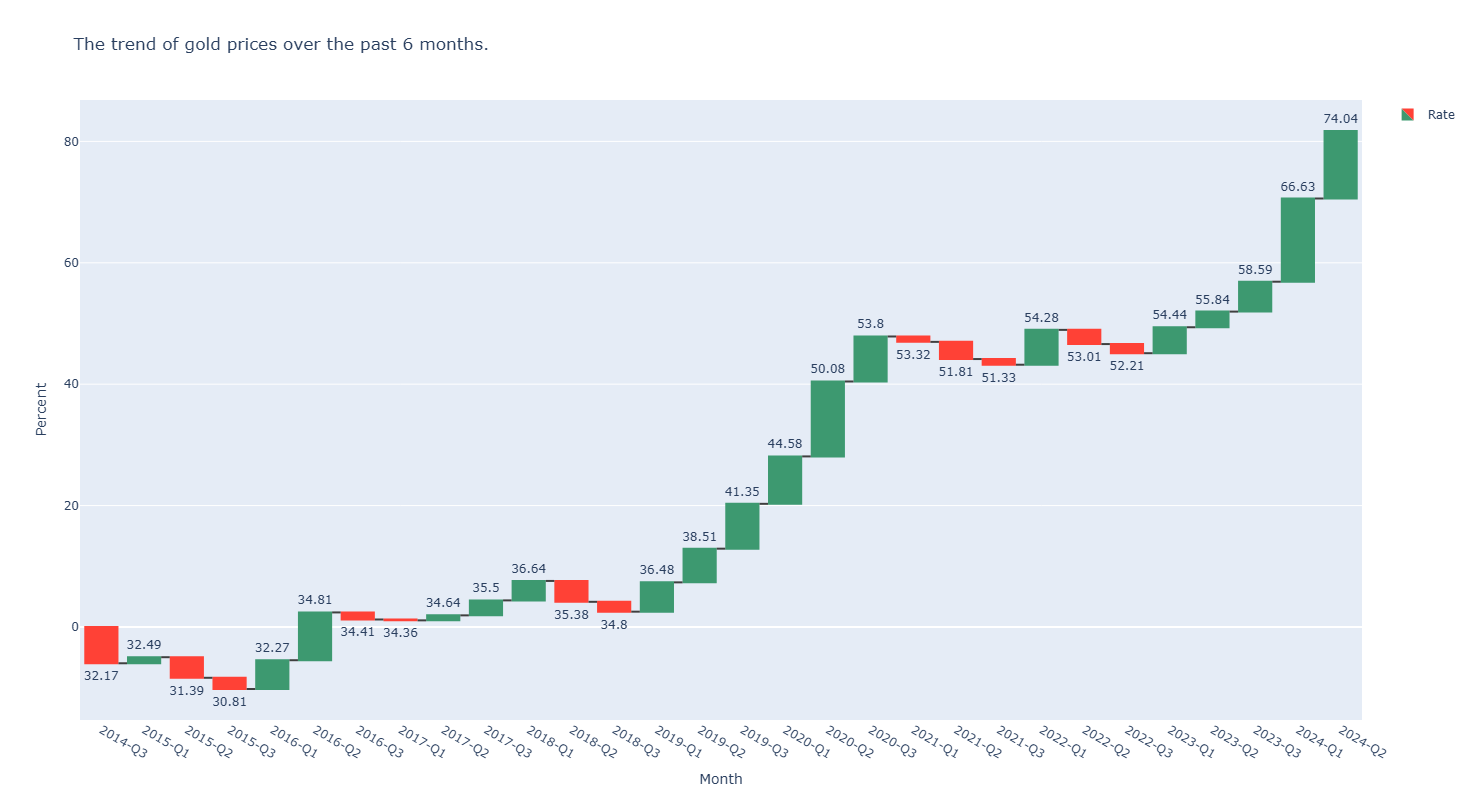

In [99]:
fig = go.Figure()
fig.add_trace(go.Waterfall(
    name = "Rate", orientation = "v",
    text = np.round(quarterly_avg_prices.values[1:],2),
    x = quarterly_avg_prices.index[1:], y=quarterly_percentage_change[1:],
    connector = {"line":{"color":"rgb(63, 63, 63)"}},
    textposition="outside",
))

fig.update_layout(
        title = "The quarter with the highest gold price increase.",
        xaxis_title='Month',
        yaxis_title='Percent',
        showlegend = True,
        width=1200,
        height=800
)

fig.show()

## Câu 3: Xác định năm có tỉ lệ giá vàng tăng cao nhất?

In [8]:
# Tạo cột năm
data['year'] = data['date'].dt.year

# Tính giá trung bình hàng năm
annual_avg_prices = data.groupby('year')['sell'].mean()

# Tính tỉ lệ phần trăm thay đổi giá trung bình hàng năm
annual_percentage_change = annual_avg_prices.pct_change() * 100

# Xác định năm có tỉ lệ tăng cao nhất
max_increase_year = annual_percentage_change.idxmax()
max_increase_rate = annual_percentage_change.max()
print(data)
print(annual_percentage_change)
print(f"Năm có tỉ lệ tăng giá vàng cao nhất: {max_increase_year}")
print(f"Tỉ lệ tăng cao nhất trong năm đó: {max_increase_rate:.2f}%")


      Unnamed: 0    buy   sell       date    month quarter quarter_year  year
0              1  34.30  34.10 2014-06-23  2014-06      Q2      2014-Q2  2014
1             18  34.35  34.15 2014-06-24  2014-06      Q2      2014-Q2  2014
2             38  34.45  34.25 2014-06-25  2014-06      Q2      2014-Q2  2014
3             52  34.43  34.23 2014-06-26  2014-06      Q2      2014-Q2  2014
4             66  34.45  34.25 2014-06-27  2014-06      Q2      2014-Q2  2014
...          ...    ...    ...        ...      ...     ...          ...   ...
3037       24231  74.70  72.90 2024-06-13  2024-06      Q2      2024-Q2  2024
3038       24233  74.60  72.80 2024-06-14  2024-06      Q2      2024-Q2  2024
3039       24235  75.10  73.40 2024-06-15  2024-06      Q2      2024-Q2  2024
3040       24237  75.00  73.30 2024-06-17  2024-06      Q2      2024-Q2  2024
3041       24239  75.00  73.30 2024-06-18  2024-06      Q2      2024-Q2  2024

[3042 rows x 8 columns]
year
2014          NaN
2015    -4.15279

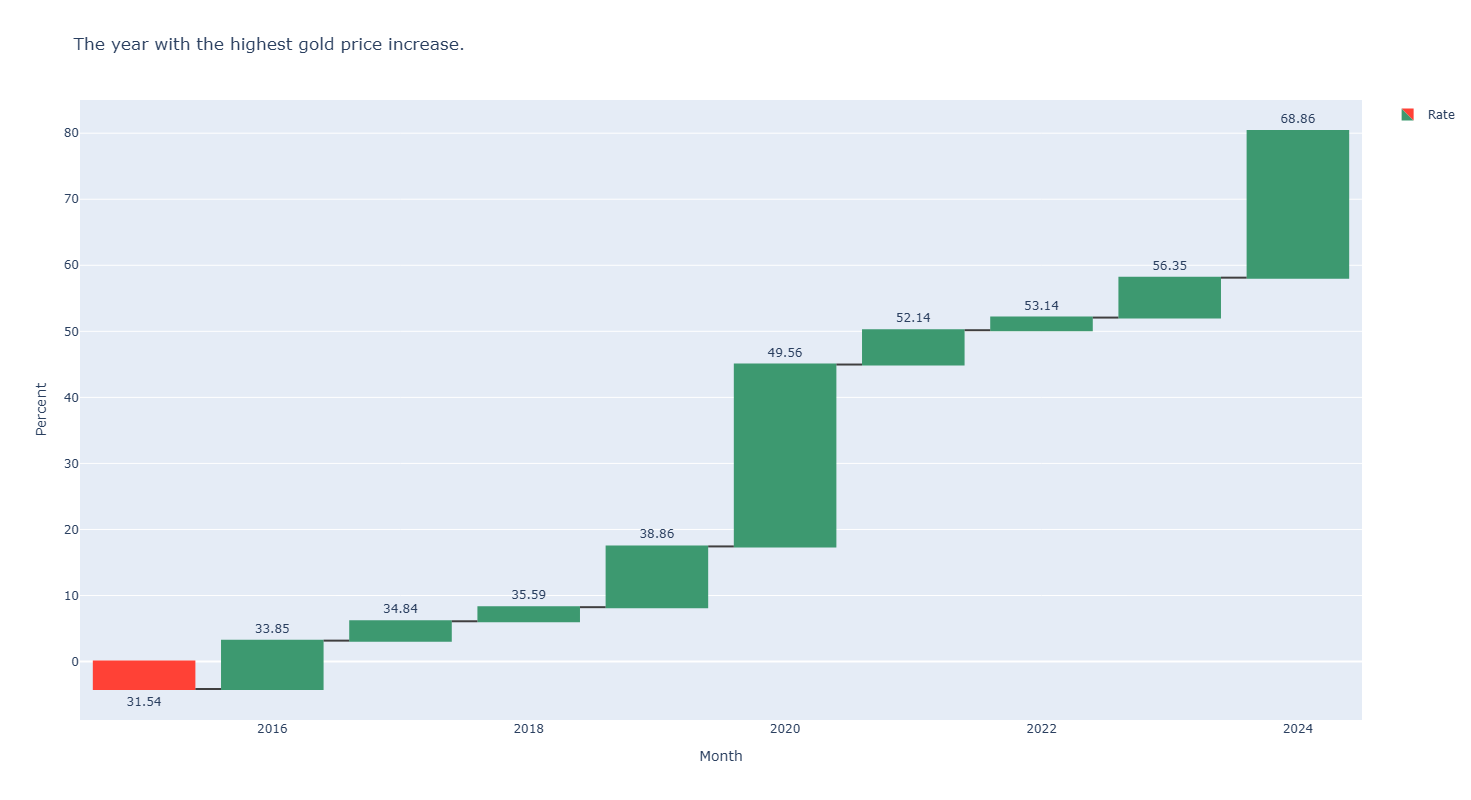

In [110]:
fig = go.Figure()
fig.add_trace(go.Waterfall(
    name = "Rate", orientation = "v",
    text = np.round(annual_avg_prices.values[1:],2),
    x = annual_avg_prices.index[1:], y=annual_percentage_change[1:],
    connector = {"line":{"color":"rgb(63, 63, 63)"}},
    textposition="outside",
))

fig.update_layout(
        title = "The year with the highest gold price increase.",
        xaxis_title='Month',
        yaxis_title='Percent',
        showlegend = True,
        width=1200,
        height=800
)

fig.show()